# Neural Networks - Homework

__Métodos Intensivos de Computación Estadística__

Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.co

See my [Github Account](https://github.com/juanse1608) to know more about me and my projects.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import scipy as sc
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn import datasets,svm,metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import load_digits
from sklearn import preprocessing
import matplotlib.pylab as plt

Using TensorFlow backend.


## ETL for Digits Dataset

Let's normalize the data and see the shapes of train and test datsets. 

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('The shape of train images is ' + np.str(train_images.shape))
print('The shape of test images is ' + np.str(test_images.shape))

11493376/11490434 [==============================] - 8s 1us/step
The shape of train images is (60000, 28, 28)
The shape of test images is (10000, 28, 28)


In [3]:
#Normalizing pixels, so the take values from 0 to 1
train_images, test_images = train_images/255.0, test_images/255.0

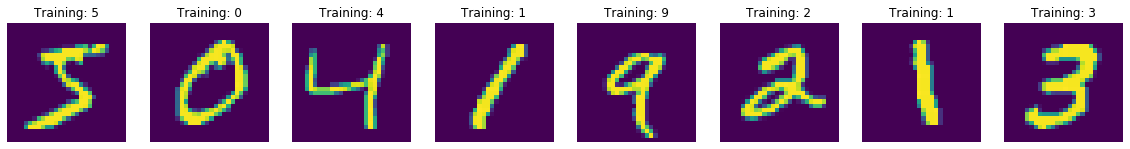

In [4]:
#Let's visualizate the digits (the first n digits)
n = 8
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.axis('off')
    plt.imshow(train_images[i,:].reshape((28,28)))
    plt.title('Training: %i' % train_labels[i]) 

In this article https://www.pyimagesearch.com/2018/10/08/keras-vs-tensorflow-which-one-is-better-and-which-one-should-i-learn/, It is explained that the best way to proceed is to use Keras with Tensorflow. So, I'll be using Keras inside Tensorflow.

In [5]:
size_labels = len(np.unique(train_labels)) ; size_labels

10

## Neural Networks

Let's see the perfomance of the Networks by changing the number of layers, neurons in each layer, activation functions, epochs and batch size.

The main idea is to pick a model that classifies well the digits in the test dataset without overfitting.

In [6]:
#Se da la estructura del modelo 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(15, activation=tf.nn.relu),
    keras.layers.Dense(size_labels, activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=25)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3097 - accuracy: 0.9088 - loss: 0.3130 - accuracy: 
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1387 - accuracy: 0.9588
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0988 - accuracy: 0.9700
Epoch 4/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0834 - accuracy: 0.9746
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0672 - accuracy: 0.9786


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9712


After repeting this procedure with several combinations of layers, neurons, epochs and batch sizes, I picked a model with:

1. Train Accuracy: 97.92%
2. Test Accuracy: 97.12%

This network has the following attributes:

1. 3 hidden layers: The first one with 60 neurons, the second one with 30 and the third with 15 neurons.
2. The activation function of the Hidden Layers is the RELU function.
3. The final activation function is the SOFTMAX function, recommended for multiclass problems.
4. The optimization method is ADAM (a method of stochastic gradient function).
5. The loss function is sparse categorical cross entropy.

I think that there is no so much difference between train and test accuracy, so it's not an overfitting model. Let's take a look at the __Confusion Matrix__. 

In [12]:
predictions = model.predict(test_images)
predictions.shape

(10000, 10)

In [13]:
predictions_reshaped = np.apply_along_axis(np.argmax, axis=1, arr=predictions)
predictions_reshaped.shape

(10000,)

In [14]:
#Function which objective is to plot in a fancy way the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")

    #print(cm)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

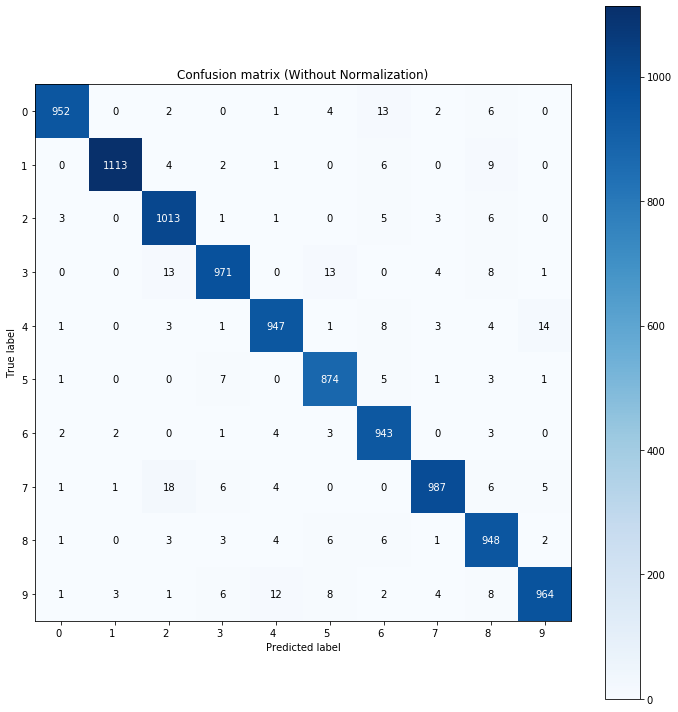

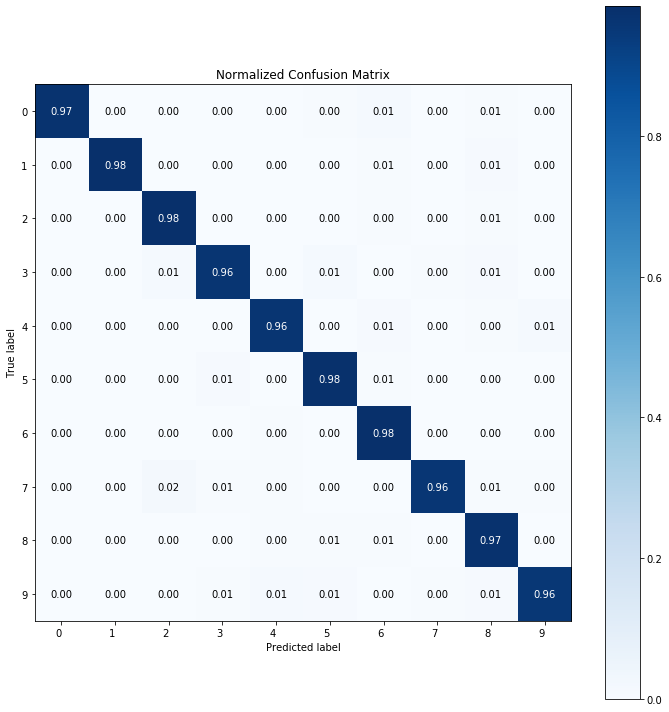

In [15]:
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plot_confusion_matrix(test_labels, predictions_reshaped, classes=np.sort(np.unique(train_labels)),
                      title='Confusion matrix (Without Normalization)')

plt.show()
# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, predictions_reshaped, classes=np.sort(np.unique(train_labels)),
                      normalize=True, title='Normalized Confusion Matrix')

plt.show()

It is a great Confusion Matrix! 

But let's take a look of the important statistics of this Confusion Matrix:

In [16]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(test_labels, predictions_reshaped)))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x155288be0>:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.98      0.97       892
           6       0.95      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




The Lowest and Highest Precision: 96% and 99%. 

The Lowest and Highest Recall: 95% and 99%. 

The Lowest and Highest $F_1$-score: 97% and 99%. 

We have very high average precision, recall and $F_1$-score (all of approx 97%)

### Convolutional Neural Networks 

Let's see if we can get better using convolutional neural networks. This type of networks learns by looking what happens in little windows of the image. 

In [20]:
train_images_conv = train_images.reshape((len(train_images), 28, 28, 1))
test_images_conv = test_images.reshape((len(test_images), 28, 28, 1))

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
#Let's train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images_conv, train_labels, epochs=5, batch_size=50)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.2697 - accuracy: 0.9133
Epoch 2/5
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0977 - accuracy: 0.9704
Epoch 3/5
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.0767 - accuracy: 0.9758
Epoch 4/5
60000/60000 [==============================] - 196s 3ms/sample - loss: 0.0633 - accuracy: 0.9796
Epoch 5/5
60000/60000 [==============================] - 190s 3ms/sample - loss: 0.0570 - accuracy: 0.9816


In [28]:
test_loss, test_acc = model.evaluate(test_images_conv, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9909


In [538]:
#Let's see the summary of the CNN
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 10, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_82 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_233 (Dense)            (None, 64)                102464    
__________

After repeting this procedure with several combinations of layers, neurons, epochs and batch sizes, I picked a model with:

1. Train Accuracy: 99.40%
2. Test Accuracy: 99.27%

I think that there is no so much difference between train and test accuracy, so it's not an overfitting model. Let's take a look at the __Confusion Matrix__. 

In [539]:
predictions = model.predict(test_images_conv)
predictions.shape

(10000, 10)

In [540]:
predictions_reshaped = np.apply_along_axis(np.argmax, axis=1, arr=predictions)
predictions_reshaped.shape

(10000,)

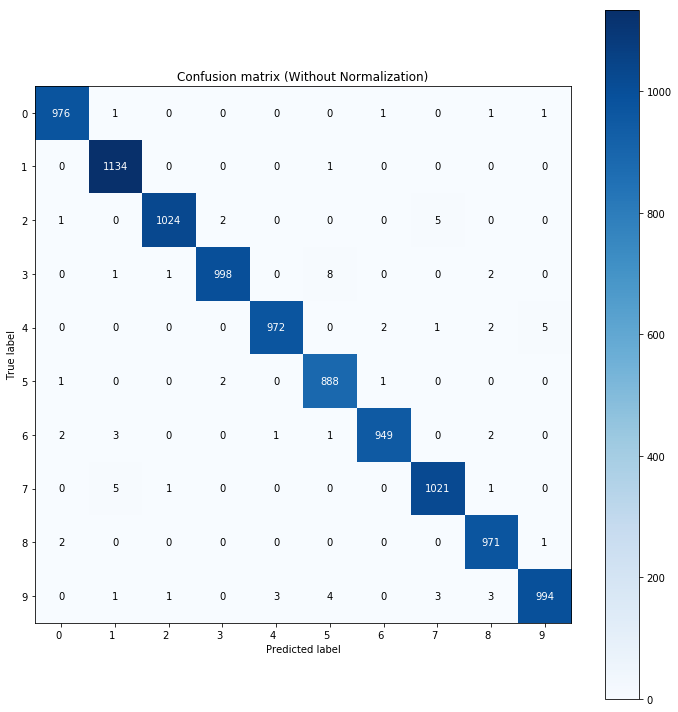

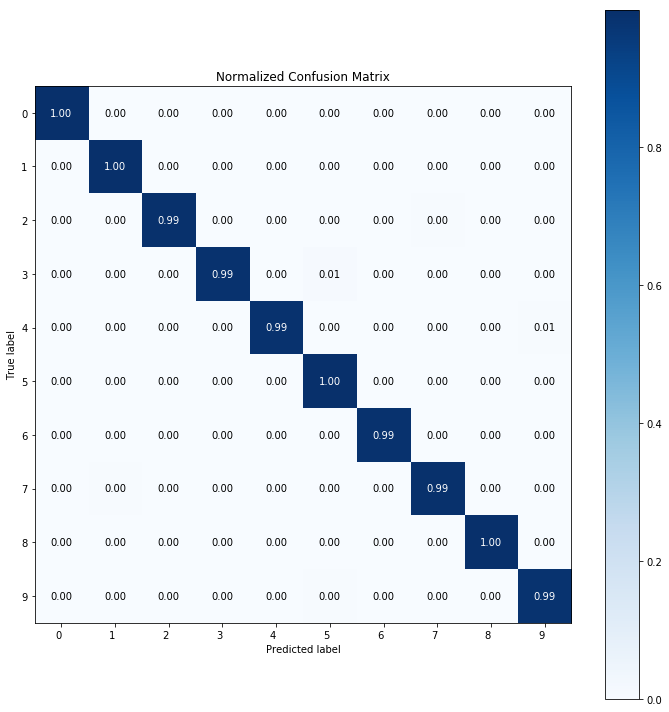

In [541]:
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plot_confusion_matrix(test_labels, predictions_reshaped, classes=np.sort(np.unique(train_labels)),
                      title='Confusion matrix (Without Normalization)')

plt.show()
# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, predictions_reshaped, classes=np.sort(np.unique(train_labels)),
                      normalize=True, title='Normalized Confusion Matrix')

plt.show()

It is a great Confusion Matrix! 

But let's take a look of the important statistics of this Confusion Matrix:

In [542]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(test_labels, predictions_reshaped)))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x1a569c3c50>:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




The Lowest and Highest Precision: 99% and 100%. 

The Lowest and Highest Recall: 99% and 100%. 

The Lowest and Highest $F_1$-score: 99% and 100%. 

We have very high average precision, recall and $F_1$-score (all of approx 99%)

Summarizing, I've found a CNN that classify better (and almost perfectly) the digits based on their images. 